# Polynômes multivariés : application au cas de la déviation verticale de la poutre encastrée

## Références

* http://openturns.github.io/openturns/master/theory/meta_modeling/chaos_basis.html
* http://openturns.github.io/openturns/master/theory/meta_modeling/orthorgonal_polynomials.html
* http://openturns.github.io/openturns/master/user_manual/_generated/openturns.LinearEnumerateFunction.html
* http://openturns.github.io/openturns/master/user_manual/_generated/openturns.HyperbolicAnisotropicEnumerateFunction.html

# Problem statement

We consider a cantilever beam defined by its Young’s modulus $E$, its length $L$ and its section modulus $I$. One end is built in a wall and we apply a concentrated bending load $F$ at the other end of the beam, resulting in a vertical deviation $Y$.

<img src="poutre.png" width="200">

__Inputs__:  $\left\{ E, F, L, I \right\}$
* $E$ : Young modulus (Pa)
* $L$ : Length of beam (cm),
* $I$ : Moment of inertia (cm^4),
* $F$ : Loading (N)

|Variable|  Distribution|
| ------------- |-------------|
|E|  Beta(r = 0.9, t = 3.5, a = $2.5\times 10^7$, $b = 5\times 10^7$) |
|F| Lognormal($\mu=3 \times 10^4$, $\sigma=9\times 10^3$)|
|L|Uniform(min=250.0, max= 260.0)|
|I| Beta(r = 2.5, t = 4.0, a = 310, b = 450)|

The input variables are supposed to be independent.

## Définir des polyômes multivariés

Dans cette partie, nous allons voir comment définir des polynômes multivariés à partir d'un vecteur aléatoire dont les marginales sont indépendantes. 
Pour commencer, nous devons définir les lois de distributions des variables aléatoires. 

In [1]:
import openturns as ot

In [2]:
dist_E = ot.Beta(0.9, 3.1, 2.8e7, 4.8e7)
F_para = ot.LogNormalMuSigma(3.0e4, 9.0e3, 15.0e3) # in N
dist_F = ot.ParametrizedDistribution(F_para)
dist_L = ot.Uniform(250., 260.) # in cm
dist_I = ot.Beta(2.5, 4, 310., 450.) # in cm^4

La classe `OrthogonalProductPolynomialFactory` permet de définir une collection de polynômes univariés.

In [3]:
multivariateBasis = ot.OrthogonalProductPolynomialFactory([dist_E, dist_F, dist_L, dist_I])

La méthode `getEnumerateFunction` permet d'obtenir la règle d'énumération des polynômes multivariés. Par défaut, c'est la règle linéaire qui est utilisée.

In [4]:
enumfunc = multivariateBasis.getEnumerateFunction()
enumfunc

class=LinearEnumerateFunction dimension=4

La méthode `getStrataCumulatedCardinal` permet d'obtenir le nombre de multi-indices de degré total inférieur ou égal au degré donné.

In [5]:
totalDegree = 3
P = enumfunc.getStrataCumulatedCardinal(totalDegree)
P

35

Dans la boucle suivante, on fait une boucle sur tous les polynômes de degré total inférieur ou égal à `P`. Pour chaque polynôme, on évalue la règle d'énumération pour obtenir le multi-indice associé. 

In [6]:
print('#  Degree  Multiindex')
for i in range(P):
    multiindex = enumfunc(i)
    degree = sum(multiindex)
    print("#%d %s %15s" % (i,degree,multiindex))

#  Degree  Multiindex
#0 0       [0,0,0,0]
#1 1       [1,0,0,0]
#2 1       [0,1,0,0]
#3 1       [0,0,1,0]
#4 1       [0,0,0,1]
#5 2       [2,0,0,0]
#6 2       [1,1,0,0]
#7 2       [1,0,1,0]
#8 2       [1,0,0,1]
#9 2       [0,2,0,0]
#10 2       [0,1,1,0]
#11 2       [0,1,0,1]
#12 2       [0,0,2,0]
#13 2       [0,0,1,1]
#14 2       [0,0,0,2]
#15 3       [3,0,0,0]
#16 3       [2,1,0,0]
#17 3       [2,0,1,0]
#18 3       [2,0,0,1]
#19 3       [1,2,0,0]
#20 3       [1,1,1,0]
#21 3       [1,1,0,1]
#22 3       [1,0,2,0]
#23 3       [1,0,1,1]
#24 3       [1,0,0,2]
#25 3       [0,3,0,0]
#26 3       [0,2,1,0]
#27 3       [0,2,0,1]
#28 3       [0,1,2,0]
#29 3       [0,1,1,1]
#30 3       [0,1,0,2]
#31 3       [0,0,3,0]
#32 3       [0,0,2,1]
#33 3       [0,0,1,2]
#34 3       [0,0,0,3]


## Exercices

## Exercice 1 : règle d'énumération linéaire

On considère l'exemple de la poutre $(E,F,L,I)$. On note $\pi^E_j$, $\pi^F_j$, $\pi^L_j$ et $\pi^I_j$ la famille de polynôme univariés associés. Pour la base multivariée `multivariateBasis` définie précédemment, on considère la règle d'énumération par défaut. On se concentre ici sur le 52-ème multi-indice.

* Utiliser la fonction `enumfunc` pour obtenir et afficher le multi-indice d'indice 52.
* Décrire *en français* le lien entre ce multi-indice et les polynômes univariés associés : pour chaque composante de $\alpha$, décrire le degré du polynôme univarié et la variable E, F, L ou I associée. Ecrire le polynôme multivarié $\psi_\alpha$ associé en fonction des polynômes univariés $\pi^E_j$, $\pi^F_j$, $\pi^L_j$ et $\pi^I_j$.
* Quel est le degré total de ce polynôme multivarié ?
* Utiliser la méthode `build` de l'objet `multivariateBasis` pour calculer et afficher le polynôme $\psi_\alpha$ correspondant.

## Solution de l'exercice 1 : règle d'énumération linéaire

In [7]:
enumfunc = multivariateBasis.getEnumerateFunction()
multiindex = enumfunc(52)
multiindex

[1,0,2,1]

On note :
* $\xi_E$ la variable aléatoire standard associée à la variable physique $E$ par la transformation $\xi_E = T(E)$,
* $\xi_F$ la variable aléatoire standard associée à la variable physique $E$ par la transformation $\xi_F = T(F)$,
* $\xi_L$ la variable aléatoire standard associée à la variable physique $E$ par la transformation $\xi_L = T(L)$,
* $\xi_I$ la variable aléatoire standard associée à la variable physique $E$ par la transformation $\xi_I = T(I)$.

Le multi-indice précédent est associé 
* au polynôme de Jacobi $J_1$ degré 1 en $\xi_E$,
* au polynôme orthogonal associé à la loi log-normale de degré 0 en $\xi_F$,
* au polynôme de Legendre $L_2$ de degré 2 en $\xi_L$,
* au polynôme de Jacobi $J_1$ de degré 1 en $\xi_I$.

Le polynôme multivarié $\psi_\alpha$ est donc :
$$
\psi_\alpha(\xi) = J_1(\xi_E) \times \pi^F_0 (\xi_F) \times L_2 (\xi_L) \times J_1(\xi_I)
$$
pour tout $\xi\in\mathbf{R}^4$.

In [8]:
totaldegree = sum(multiindex)
totaldegree

4

In [9]:
P = multivariateBasis.build(52)
P

class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,x1,x2,x3,y0] evaluationImplementation=class=ProductPolynomialEvaluation, polynomials=[class=UniVariatePolynomial coefficients=class=Point name=Unnamed dimension=2 values=[0.935347,2.23044],class=UniVariatePolynomial coefficients=class=Point name=Unnamed dimension=1 values=[1],class=UniVariatePolynomial coefficients=class=Point name=Unnamed dimension=3 values=[-1.11803,0,3.3541],class=UniVariatePolynomial coefficients=class=Point name=Unnamed dimension=2 values=[-0.57735,2.3094]] gradientImplementation=class=ProductPolynomialGradient hessianImplementation=class=ProductPolynomialHessian

On voit que le polynôme ne dépend pas de $\xi_F$, ce qui correspond en effet à l'exposant égal à zéro dans le mult-indice.

## Exercice 2 : règle d'énumération hyperbolique

La règle d'énumération linéaire est associée à un ordre d'énumération des multi-indices tel que chaque les interactions d'ordre élevée entre les variables apparaissent souvent. Or, dans beaucoup de modèles physiques, les interactions entre variables sont moins importantes. 

La règle d'énumération hyperbolique permet de générer un ordre tel que les interactions sont moins fréquentes dans le modèle. Pour un paramètre $q\in]0,1]$ donné et des poids $w\in\mathbf{R}^n$ donnés, la norme $\|\cdot\|_{w,q}$ d'un multi-indice $\alpha$ est définie par :
$$
\|\cdot\|_{w,q} = \left( \sum_{i=1}^n w_i \alpha_i^q \right)^{\frac{1}{q}}.
$$

* Utiliser la classe `HyperbolicAnisotropicEnumerateFunction` pour définir une règle hyperbolique de paramètre $q=0.5$ en dimension 4 avec les poids $w$ par défaut. 
* Afficher les 10 premiers multi-indices associés à cette règle.
* Utiliser la méthode `getWeight` pour récupérer le vecteur des poids.

## Solution de l'exercice 2 : règle d'énumération hyperbolique

In [10]:
enumfunc = ot.HyperbolicAnisotropicEnumerateFunction(4, 0.5)

In [11]:
w = enumfunc.getWeight()
w

class=Point name=Unnamed dimension=4 values=[1,1,1,1]

In [12]:
for i in range(10):
    print(enumfunc(i))

[0,0,0,0]
[1,0,0,0]
[0,1,0,0]
[0,0,1,0]
[0,0,0,1]
[2,0,0,0]
[0,2,0,0]
[0,0,2,0]
[0,0,0,2]
[3,0,0,0]


## Exercice 3 : utilisation d'une règle d'énumération

Le second argument de la classe `OrthogonalProductPolynomialFactory` permet de spécifier une règle d'énumération choisie par l'utilisateur. Dans ce cas, le premier argument doit être une liste de polynômes orthogonaux univariés, ou, plus précisément, une instance de la classe `PolynomialFamilyCollection`. 

* Utiliser le script suivant pour définir une collection de polynômes orthogonaux univariés.
```
marginals = [dist_E, dist_F, dist_L, dist_I]
stdPolyColl = [ot.StandardDistributionPolynomialFactory(m) for m in marginals]
polyColl = ot.PolynomialFamilyCollection(stdPolyColl)
```
* Utiliser l'instruction suivante pour définir la base orthogonale tensoriée associée à la règle d'énumération de votre choix.
```
multivariateBasis = ot.OrthogonalProductPolynomialFactory(polyColl, enumfunc)
```
* Utiliser la méthode `getNodesAndWeights` pour récupérer les noeuds et les poids de la quadrature de Gauss tensorisée associée à ce polynôme orthogonal multivarié.

## Solution de l'exercice 3 : utilisation d'une règle d'énumération

In [13]:
marginals = [dist_E, dist_F, dist_L, dist_I]
stdPolyColl = [ot.StandardDistributionPolynomialFactory(m) for m in marginals]
polyColl = ot.PolynomialFamilyCollection(stdPolyColl)
polyColl

[class=OrthogonalUniVariatePolynomialFamily implementation=class=StandardDistributionPolynomialFactory hasSpecificFamily=true specificFamily=class=OrthogonalUniVariatePolynomialFamily implementation=class=JacobiFactory alpha=1.2 beta=-0.1 measure=class=Beta name=Beta dimension=1 r=0.9 t=3.1 a=-1 b=1,class=OrthogonalUniVariatePolynomialFamily implementation=class=StandardDistributionPolynomialFactory hasSpecificFamily=false orthonormalization algorithm=class=OrthonormalizationAlgorithm implementation=class=AdaptiveStieltjesAlgorithm measure=class=LogNormal name=LogNormal dimension=1 muLog=9.46206 sigmaLog=0.554513 gamma=0 monicRecurrenceCoefficients=[class=Point name=Unnamed dimension=3 values=[1,-15000,0],class=Point name=Unnamed dimension=3 values=[1,-33144,-8.1e+07]] monicSquaredNorms=class=Point name=Unnamed dimension=2 values=[1,8.1e+07] isElliptical=false,class=OrthogonalUniVariatePolynomialFamily implementation=class=StandardDistributionPolynomialFactory hasSpecificFamily=true sp

In [14]:
multivariateBasis = ot.OrthogonalProductPolynomialFactory(polyColl, enumfunc)
multivariateBasis

class=OrthogonalProductPolynomialFactory univariate polynomial collection=[class=OrthogonalUniVariatePolynomialFamily implementation=class=StandardDistributionPolynomialFactory hasSpecificFamily=true specificFamily=class=OrthogonalUniVariatePolynomialFamily implementation=class=JacobiFactory alpha=1.2 beta=-0.1 measure=class=Beta name=Beta dimension=1 r=0.9 t=3.1 a=-1 b=1,class=OrthogonalUniVariatePolynomialFamily implementation=class=StandardDistributionPolynomialFactory hasSpecificFamily=false orthonormalization algorithm=class=OrthonormalizationAlgorithm implementation=class=AdaptiveStieltjesAlgorithm measure=class=LogNormal name=LogNormal dimension=1 muLog=9.46206 sigmaLog=0.554513 gamma=0 monicRecurrenceCoefficients=[class=Point name=Unnamed dimension=3 values=[1,-15000,0],class=Point name=Unnamed dimension=3 values=[1,-33144,-8.1e+07]] monicSquaredNorms=class=Point name=Unnamed dimension=2 values=[1,8.1e+07] isElliptical=false,class=OrthogonalUniVariatePolynomialFamily implementation=class=StandardDistributionPolynomialFactory hasSpecificFamily=true specificFamily=class=OrthogonalUniVariatePolynomialFamily implementation=class=LegendreFactory measure=class=Uniform name=Uniform dimension=1 a=-1 b=1,class=OrthogonalUniVariatePolynomialFamily implementation=class=StandardDistributionPolynomialFactory hasSpecificFamily=true specificFamily=class=OrthogonalUniVariatePolynomialFamily implementation=class=JacobiFactory alpha=0.5 beta=1.5 measure=class=Beta name=Beta dimension=1 r=2.5 t=4 a=-1 b=1] measure=class=ComposedDistribution name=ComposedDistribution dimension=4 copula=class=IndependentCopula name=IndependentCopula dimension=4 marginal[0]=class=Beta name=Beta dimension=1 r=0.9 t=3.1 a=-1 b=1 marginal[1]=class=LogNormal name=LogNormal dimension=1 muLog=9.46206 sigmaLog=0.554513 gamma=0 marginal[2]=class=Uniform name=Uniform dimension=1 a=-1 b=1 marginal[3]=class=Beta name=Beta dimension=1 r=2.5 t=4 a=-1 b=1

In [15]:
nodes, weights = multivariateBasis.getNodesAndWeights([2,2,2,2])
print(nodes)
print(weights)

 0 : [    -0.732453 11293.1         -0.57735     -0.274292 ]
 1 : [     0.222649 11293.1         -0.57735     -0.274292 ]
 2 : [    -0.732453 36850.9         -0.57735     -0.274292 ]
 3 : [     0.222649 36850.9         -0.57735     -0.274292 ]
 4 : [    -0.732453 11293.1          0.57735     -0.274292 ]
 5 : [     0.222649 11293.1          0.57735     -0.274292 ]
 6 : [    -0.732453 36850.9          0.57735     -0.274292 ]
 7 : [     0.222649 36850.9          0.57735     -0.274292 ]
 8 : [    -0.732453 11293.1         -0.57735      0.607625 ]
 9 : [     0.222649 11293.1         -0.57735      0.607625 ]
10 : [    -0.732453 36850.9         -0.57735      0.607625 ]
11 : [     0.222649 36850.9         -0.57735      0.607625 ]
12 : [    -0.732453 11293.1          0.57735      0.607625 ]
13 : [     0.222649 11293.1          0.57735      0.607625 ]
14 : [    -0.732453 36850.9          0.57735      0.607625 ]
15 : [     0.222649 36850.9          0.57735      0.607625 ]
[0.116521,0.0568259,0.01

## Exercice 4 : nombre de polynômes avec la règle d'énumération linéaire

Avec la règle d'énumération linéaire par défaut, on souhaite créer un graphique qui représente le nombre de polynômes $P$ en fonction du degré total `p`. 
* Créer une boucle `for` sur le degré total `p` entre 1 et 15. 
* Pour chaque valeur de `p`, utiliser la méthode `getStrataCumulatedCardinal` de la fonction d'énumération pour obtenir le nombre de polynômes de degré inférieur ou égal à `p`.
* Créer un graphique représentant le nombre de coefficients en fonction du degré total.

## Solution de l'exercice 4 : nombre de polynômes avec la règle d'énumération linéaire


Définit la base de polynômes avec la règle d'énumération linéaire par défaut.

In [16]:
p = 5
multivariateBasis = ot.OrthogonalProductPolynomialFactory([dist_E, dist_F, dist_L, dist_I])
enumfunc = multivariateBasis.getEnumerateFunction()

Plot the number of polynomials as a function of highest polynomial degree (using the linear enumeration).

In [17]:
enumfunc = multivariateBasis.getEnumerateFunction()
degreeList = range(1,15)
P_list = []
for i in degreeList:
    nbcoeffs = enumfunc.getStrataCumulatedCardinal(i)
    P_list.append(nbcoeffs)

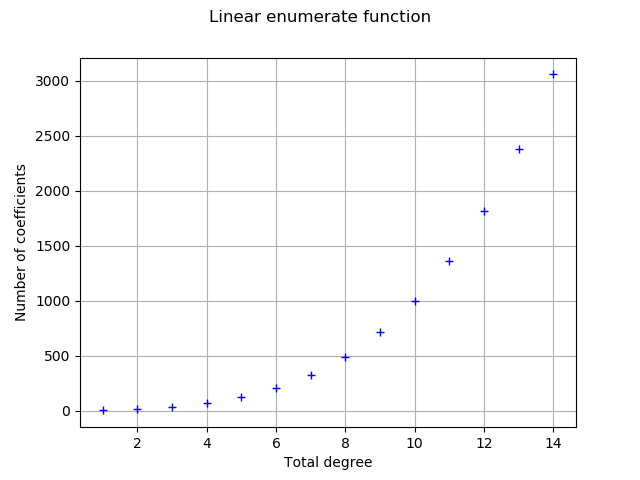

In [18]:
graph = ot.Graph('Linear enumerate function', 'Total degree', 'Number of coefficients', True)
cloud = ot.Cloud(degreeList, P_list)
graph.add(cloud)
graph

## Exercice 5 : utilisation d'une règle d'énumération hyperbolique

The hyperbolic enumeration scheme reduces the number of candidate polynomials for a given maximum degree.

* Use the `HyperbolicAnisotropicEnumerateFunction`  with the following parameters:
  - hyperbolic parameter $q=0.6$
  - highest polynomial degree $p=5$

In order to find the solution, you may use the following template, where you must replace the `TODO` sections with valid Python code.

```
dim_input = 4
polyColl = ot.PolynomialFamilyCollection(dim_input)
polyColl[0] = ot.StandardDistributionPolynomialFactory(TODO)
polyColl[1] = ot.StandardDistributionPolynomialFactory(TODO) 
polyColl[2] = ot.StandardDistributionPolynomialFactory(TODO)
polyColl[3] = ot.StandardDistributionPolynomialFactory(TODO)
q = 0.6
enumerateFunction = ot.HyperbolicAnisotropicEnumerateFunction(dim_input, q)
multivariateBasis = ot.OrthogonalProductPolynomialFactory(polyColl, enumerateFunction)
```

* Compare the number of candidate polynomials using hyperbolic enumeration scheme and linear enumeration. 
* Display the degree of polynomials. 
* Which polynomials are discarded by the hyperbolic scheme ?
* The following `printMultiIndices` function uses the given enumerate function and prints the multi-indices with degree less than a given maximum.

In [19]:
def printMultiIndices(enumerateFunction,maximumDegree):
    P = enumerateFunction.getStrataCumulatedCardinal(maximumDegree)
    print('Number of coefficients with degree lower than %s is %s'%(maximumDegree,P) )

    print('Total degree' + '     ' + 'Multi-index')
    for i in range(P):
        index = enumerateFunction(i)
        degree = sum(index)
        print("#%d %4d %18s" % (i,degree,index))
    return

Use the `printMultiIndices` to print the multi-indices with maximum degree less than 5.
* For a given enumerate function, the `getStrataCumulatedCardinal(maximumDegree)` method returns the number of coefficients with maximum degree lower than `maximumDegree`. Set the `maximumDegree` to 5 and consider the following list of quasi-norm parameters :
```
q_list = [0.1, 0.3, 0.6, 0.9, 1.0]
```
For each value of this quasi-norm parameter, print the number of coefficients associated with the hyperbolic enumerate function. What do you observe ?
* Set the quasi-norm parameter `q=0.6`. Consider the maximum degree equal from 1 to 10. For each maximum degree value, compare the number of coefficients associated with the linear and hyperbolic enumeration functions. What do you observe ?

## Solution de l'exercice 5 : utilisation d'une règle d'énumération hyperbolique

In [20]:
dim_input = 4
polyColl = ot.PolynomialFamilyCollection(dim_input)
polyColl[0] = ot.StandardDistributionPolynomialFactory(dist_E)
polyColl[1] = ot.StandardDistributionPolynomialFactory(dist_F) 
polyColl[2] = ot.StandardDistributionPolynomialFactory(dist_L)
polyColl[3] = ot.StandardDistributionPolynomialFactory(dist_I)
#
q = 0.6# the q-quasi-norm parameter used to create a HyperbolicAnisotropicEnumerateFunction object.
enumerateFunction = ot.HyperbolicAnisotropicEnumerateFunction(dim_input, q)

multivariateBasis = ot.OrthogonalProductPolynomialFactory(polyColl, enumerateFunction)

printMultiIndices(enumerateFunction,5)

Number of coefficients with degree lower than 5 is 23
Total degree     Multi-index
#0    0          [0,0,0,0]
#1    1          [1,0,0,0]
#2    1          [0,1,0,0]
#3    1          [0,0,1,0]
#4    1          [0,0,0,1]
#5    2          [2,0,0,0]
#6    2          [0,2,0,0]
#7    2          [0,0,2,0]
#8    2          [0,0,0,2]
#9    3          [3,0,0,0]
#10    3          [0,3,0,0]
#11    3          [0,0,3,0]
#12    3          [0,0,0,3]
#13    2          [1,1,0,0]
#14    2          [1,0,1,0]
#15    2          [1,0,0,1]
#16    2          [0,1,1,0]
#17    2          [0,1,0,1]
#18    2          [0,0,1,1]
#19    4          [4,0,0,0]
#20    4          [0,4,0,0]
#21    4          [0,0,4,0]
#22    4          [0,0,0,4]


In [21]:
maximumDegree = 5
q_list = [0.1, 0.3, 0.6, 0.9, 1.0]
P_list = []
for j in q_list:
    enumerateFunction_aux = ot.HyperbolicAnisotropicEnumerateFunction(dim_input, j)
    numberOfCoefficients = enumerateFunction_aux.getStrataCumulatedCardinal(maximumDegree)
    P_list.append(numberOfCoefficients)

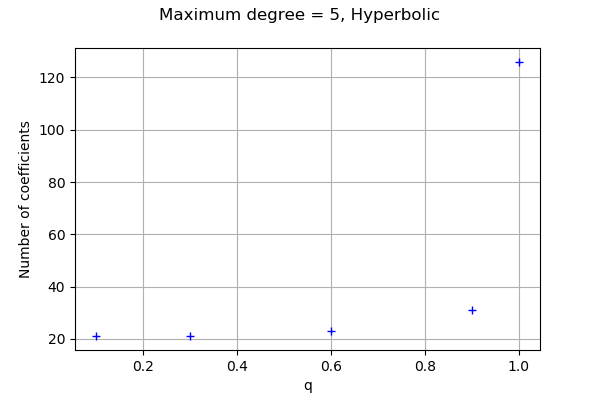

In [22]:
graph = ot.Graph('Maximum degree = %s, Hyperbolic' % (maximumDegree), 'q', 'Number of coefficients', True)
cloud = ot.Cloud(q_list, P_list)
graph.add(cloud)
graph

On observe que, lorsque `q` augmente, alors le nombre de coefficients augmente considérablement.

In [23]:
p_list = range(1,11)
P_listHyper = []
P_listLinear = [] 

enumLinear = ot.LinearEnumerateFunction(dim_input)
enumHyper = ot.HyperbolicAnisotropicEnumerateFunction(dim_input, q)
for i in p_list:
    numberOfCoefficients = enumLinear.getStrataCumulatedCardinal(i)
    P_listLinear.append(numberOfCoefficients)
    numberOfCoefficients = enumHyper.getStrataCumulatedCardinal(i)
    P_listHyper.append(numberOfCoefficients)

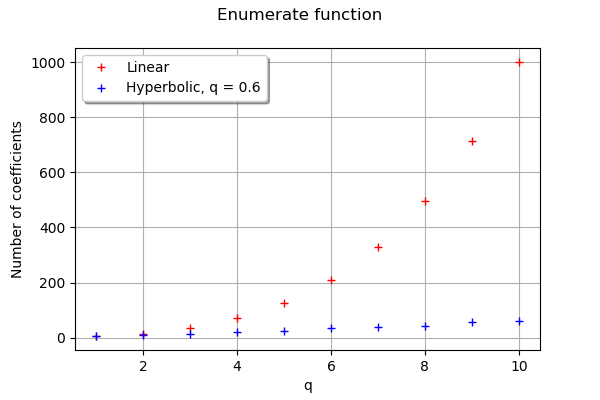

In [24]:
graph = ot.Graph('Enumerate function', 'q', 'Number of coefficients', True, "topleft")
cloudLinear = ot.Cloud(p_list, P_listLinear)
cloudLinear.setLegend('Linear')
cloudLinear.setColor("red")
graph.add(cloudLinear)
cloudHyper = ot.Cloud(p_list, P_listHyper)
cloudHyper.setLegend('Hyperbolic, q = %.1f'%q)
graph.add(cloudHyper)
graph

On observe que, avec `q=0.6`, la règle d'énumération hyperbolique produit un nombre de coefficients très petit par rapport à la règle d'énumération linéaire.

## Exercice 6 : graphique des indices linéaires, hyperboliques et norme infinie

L'objectif de cet exercice est de représenter les multi-indices associés à différentes règles d'énumération. 

La fonction `plotMultiindices` suivante dessine les multi-indices en dimension 2 associés à une règle d'énumération. Elle représente les multi-indices de 0 à l'indice `numberOfIndices` donné en argument, en annotant chaque multi-indice par son indice d'énumération.

In [25]:
def plotMultiindices(enumerateFunction,numberOfIndices,title):
    '''
    Plots 2-dimensionnal multiindices from an 2D enumerate function up to the 
    indice numberOfIndices. 
    Makes a graphics with given title.
    '''
    sample = ot.Sample(numberOfIndices,2)
    labellist = []
    for i in range(numberOfIndices):
        multiindice = enumfunc(i)
        sample[i] = multiindice
        labellist.append(str(i))
    graph = ot.Graph(title,"Indice 1","Indice 2",True,"topright")
    cloud = ot.Cloud(sample)
    graph.add(cloud)
    text = ot.Text(sample,labellist)
    text.setColor("red")
    graph.add(text)
    return graph

* Créer une `LinearEnumerateFunction` en dimension 2 et utiliser la fonction `plotMultiindices` pour représenter les 10 premiers multi-indices. Qu'observez-vous ?
* Créer une `HyperbolicAnisotropicEnumerateFunction` en dimension 2 avec le paramètre de quasi-norme `q=0.6` et utiliser la fonction `plotMultiindices` pour représenter les 10 premiers multi-indices. Qu'observez-vous ?
* Créer une `HyperbolicAnisotropicEnumerateFunction` en dimension 2 avec le paramètre de quasi-norme `q=1` et utiliser la fonction `plotMultiindices` pour représenter les 10 premiers multi-indices. Qu'observez-vous ?
* Créer une `NormInfEnumerateFunction` en dimension 2 et utiliser la fonction `plotMultiindices` pour représenter les 10 premiers multi-indices. Qu'observez-vous ?

## Solution de l'exercice 6 : graphique des indices linéaires, hyperboliques et norme infinie

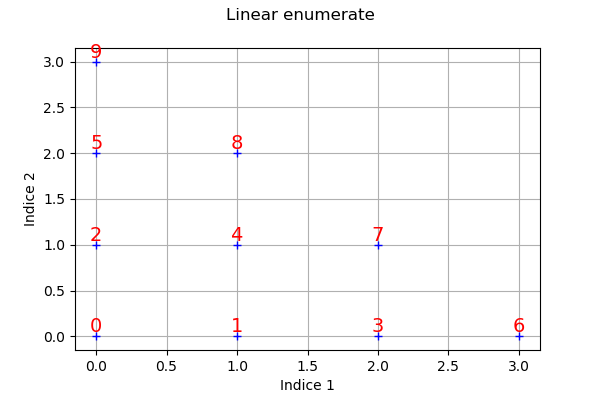

In [26]:
enumfunc = ot.LinearEnumerateFunction(2)
numberOfIndices = 10
plotMultiindices(enumfunc,numberOfIndices,"Linear enumerate")

On observe que les multiindices apparaissent selon un chemin diagonal. Sur une diagonale, le degré des polynômes est constant. 
* Les points d'indice 1, 2 sont de degré constant égal à 1. 
* Les points d'indice 3, 4, 5 sont de degré constant égal à 2. 
* Les points d'indice 6, 7, 8, 9 sont de degré constant égal à 3. 

Une telle diagonale est nommée "strate" dans la librairie. 

Cet ordre d'énumération permet d'énumérer les polynômes par strates de degrés croissants.

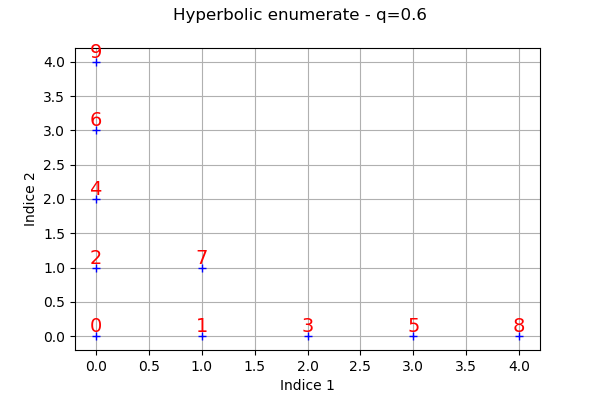

In [27]:
q = 0.6
enumfunc = ot.HyperbolicAnisotropicEnumerateFunction(2,q)
numberOfIndices = 10
plotMultiindices(enumfunc,numberOfIndices,"Hyperbolic enumerate - q=%s" % (q))

On observe que les multi-indices associés à des degrés élevés sont énumérés plus tôt dans la séquence. On observe que les degrés associés à des interactions entre X0 et X1 de degré élevé n'apparaissent pas parmi les premiers termes de la séquence. Par exemple, le multi-indice d'indice 8 est (4,0) (correspondant à un polynôme de degré 4), mais que le multi-indice (2,2) n'apparaît plus parmi les premiers termes. 

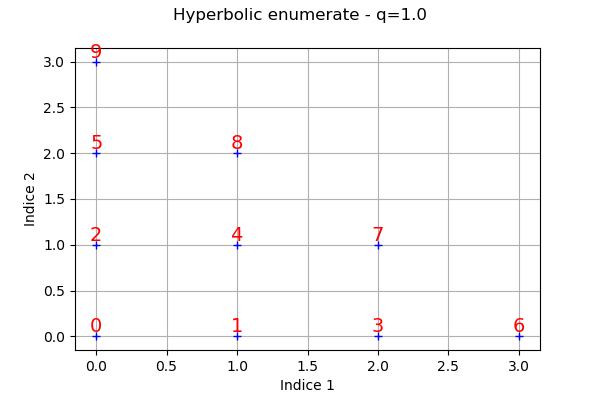

In [28]:
q = 1.
enumfunc = ot.HyperbolicAnisotropicEnumerateFunction(2,q)
numberOfIndices = 10
plotMultiindices(enumfunc,numberOfIndices,"Hyperbolic enumerate - q=%s" % (q))

On observe que la règle d'énumération hyperbolique avec q=1 est équivalente à la règle linéaire.

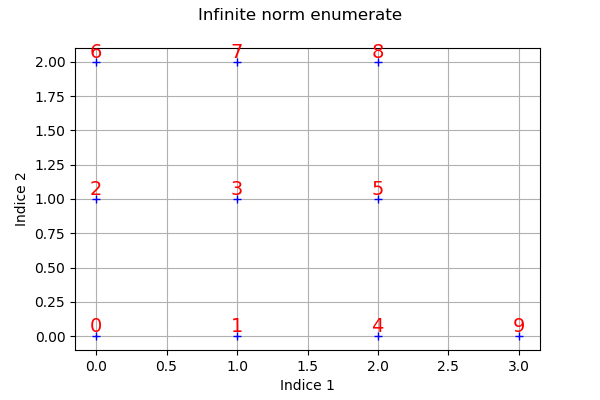

In [29]:
enumfunc = ot.NormInfEnumerateFunction(2)
numberOfIndices = 10
plotMultiindices(enumfunc,numberOfIndices,"Infinite norm enumerate")

On observe que la règle en norme infinie permet d'assurer que les interactions de degré élevé apparaissent plus rapidement dans l'énumération.